Boston House Prices Dataset
========================

Data Description
------------------------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per USD 10k 
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of UCI ML housing dataset.
http://archive.ics.uci.edu/ml/datasets/Housing


This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.

The Boston house-price data has been used in many machine learning papers that address regression
problems.   
     
**References**

   - Belsley, Kuh & Welsch, 'Regression diagnostics: Identifying Influential Data and Sources of Collinearity', Wiley, 1980. 244-261.
   - Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.
   - many more! (see http://archive.ics.uci.edu/ml/datasets/Housing)


## Main Objective of the Analysis: Interpretation
Beginning with Data Exploration and Data Preparation. Followed by  training at least three linear regression models which should be variations that cover using a simple linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, skew
import seaborn as sns
%matplotlib inline
sns.set_theme()
sns.set_context("paper")
import warnings
warnings.simplefilter("ignore")

### Load the Boston House Prices Dataset

In [2]:
filepath = "data/boston.csv"
data = pd.read_csv(filepath)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
print('Number of Observations :', data.shape[0])
print('Total Features including the Target Variable :', data.shape[1])

Number of Observations : 506
Total Features including the Target Variable : 14


## Data Exploration

### Summary information

The “info()” method in Pandas makes it easy to confirm the information of columns, non-null-value count, and its data type.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


### Missing Values

We have already checked how many non-null-values are. Here, on the contrary, we check how many missing values are. We can check it by the combination of the “isnull()” and “sum()” methods in Pandas.

In [4]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Fortunately, there are no missing values! This is because this dataset is created carefully. Note that, however, there are usually many problems we have to deal with a real dataset.

### Descriptive Statistics

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


## Exploratory Data Analysis

### Distribution of Target Variable 

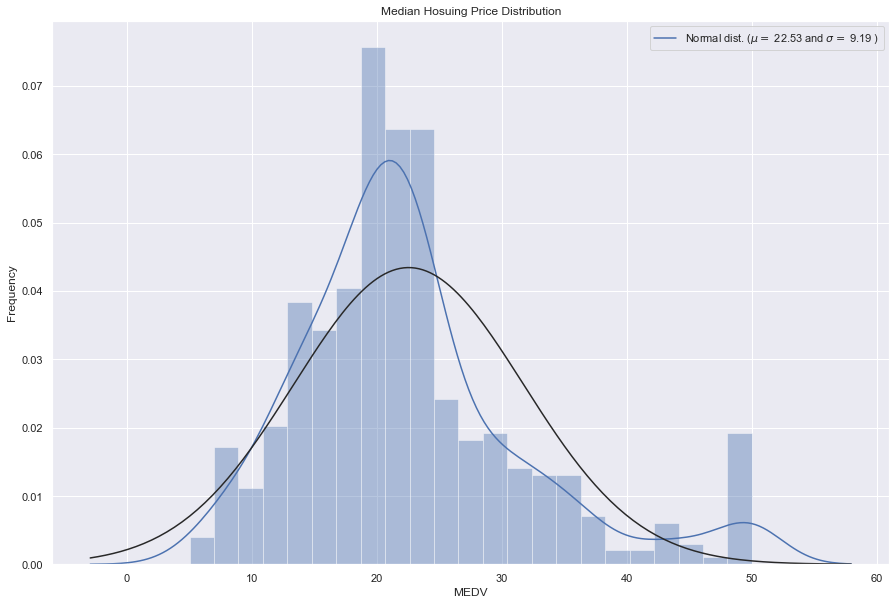

In [7]:
sns.set(rc={'figure.figsize':(15, 10)})

sns.distplot(data['MEDV'], fit=norm)

(mu, sigma) = norm.fit(data['MEDV'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Median Hosuing Price Distribution');

### Determining Normality

In [8]:
# Testing for Normal Distribution
from scipy.stats.mstats import normaltest
normaltest(data.MEDV.values)

NormaltestResult(statistic=90.9746873700967, pvalue=1.7583188871696095e-20)

The p-value is extremely low. Our y variable we've been dealing with this whole time was not normally distributed!

Linear Regression assumes a normally distributed residuals which can be aided by transforming y variable. Let's try Box Cox transformation to try and get y to be normally distributed:

In [9]:
# Transforming the Target Variable
from scipy.stats import boxcox
bc_result = boxcox(data.MEDV)
boxcox_medv = bc_result[0]
normaltest(boxcox_medv)

NormaltestResult(statistic=4.513528775533045, pvalue=0.1046886692817602)

Significantly more normally distributed (according to p value) than the other two distributions - above 0.05, even!

Now that we have a normally distributed y-variable, let's try a regression!

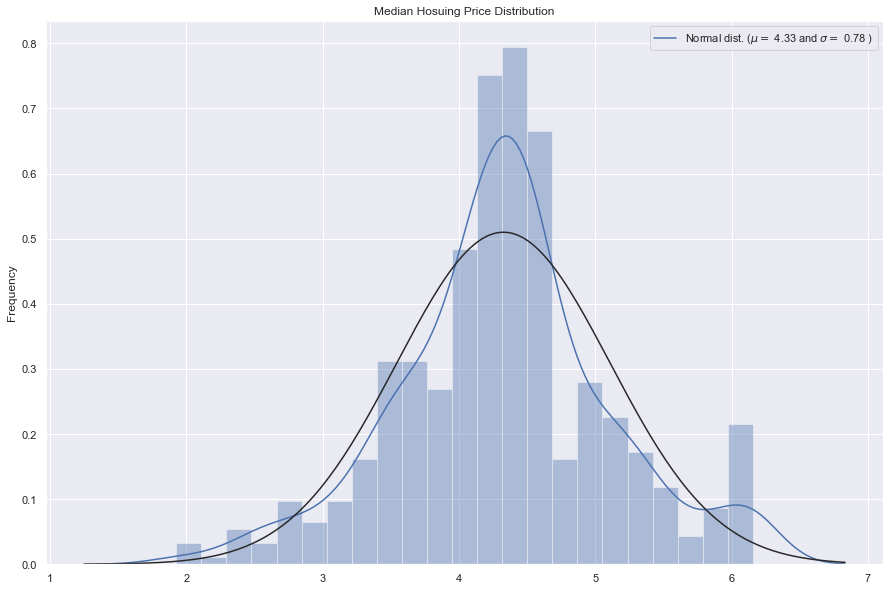

In [10]:
sns.set(rc={'figure.figsize':(15, 10)})

sns.distplot(boxcox_medv, fit=norm)

(mu, sigma) = norm.fit(boxcox_medv)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Median Hosuing Price Distribution');

### Check for Outliers  

<AxesSubplot:>

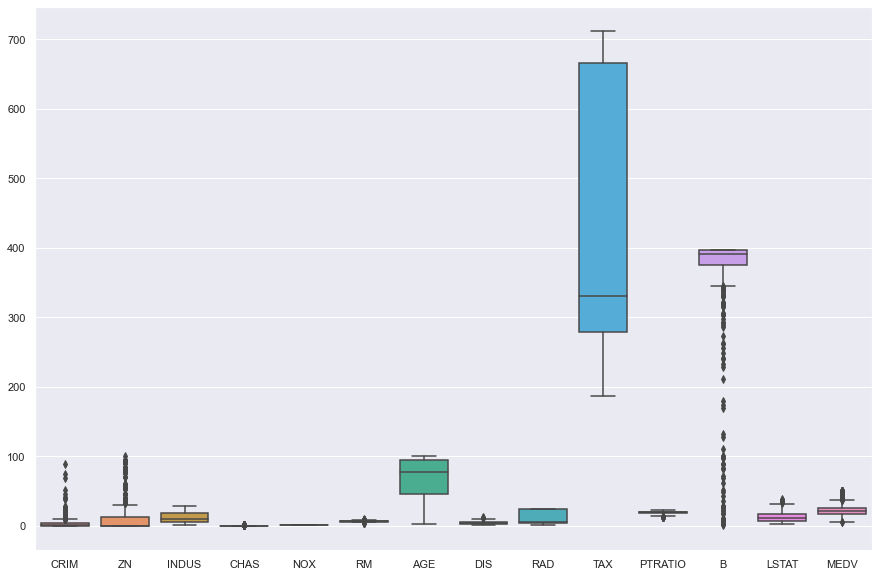

In [11]:
plt.figure(figsize=(15,10))
sns.boxplot(data=data)

There are Outliers. But most of them occupy more than 30% of our data. So, it would be wise not to remove those observations.

### Looking for Correlations

<AxesSubplot:>

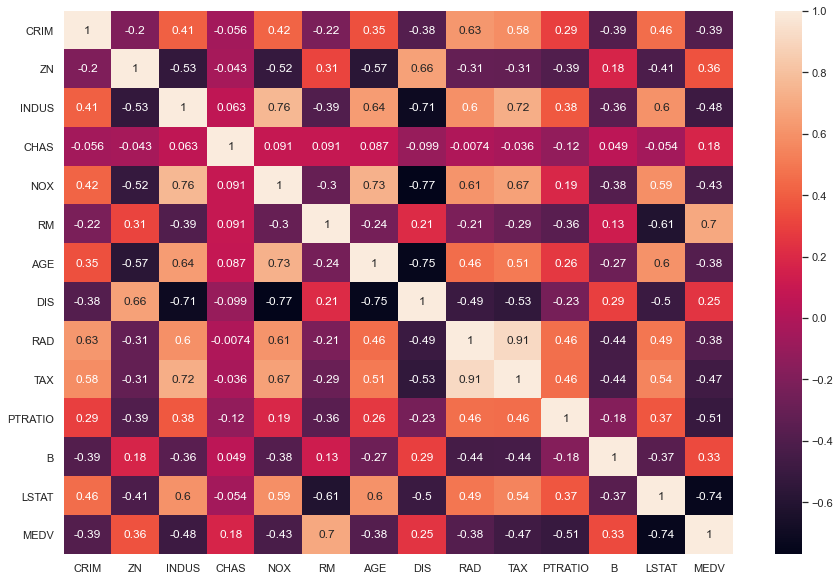

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True)

### Check for Linearity with Scatter Plot

We'll see the relationship between our target variable **MEDV** and predictor variables because in order to create a good linear model the features should have a linear relationship with the target aka. **Median House Prices/Values**.

Here, we will take a look at some of the highest/lowest correlations with our target variable. 

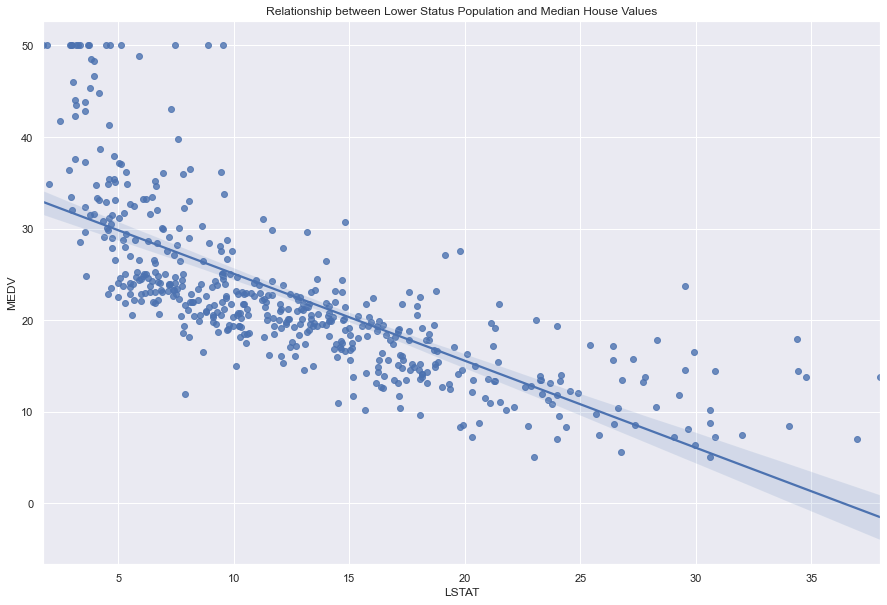

In [13]:
sns.regplot(y="MEDV",x="LSTAT", data=data, fit_reg= True)
plt.title("Relationship between Lower Status Population and Median House Values")
plt.show()

We can see a strong negative correlation between lower status population and house prices. Areas where the median house values are realtively high, the population of lower status is low and vice-versa.

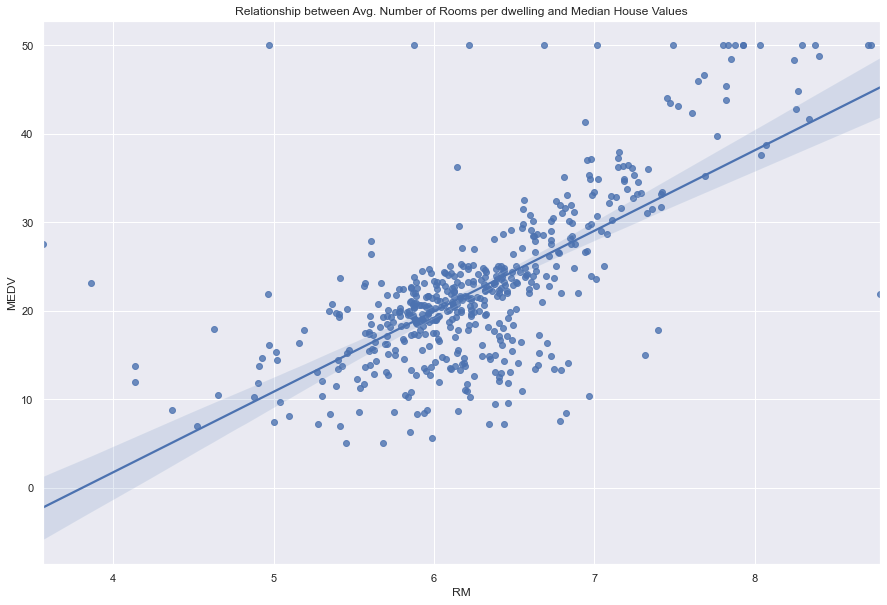

In [14]:
sns.regplot(y="MEDV",x="RM", data=data, fit_reg= True)
plt.title("Relationship between Avg. Number of Rooms per dwelling and Median House Values")
plt.show()

We can see a strong positive correlation between no. of rooms and price. No. of rooms increases/decreases with increase/decrease in price.

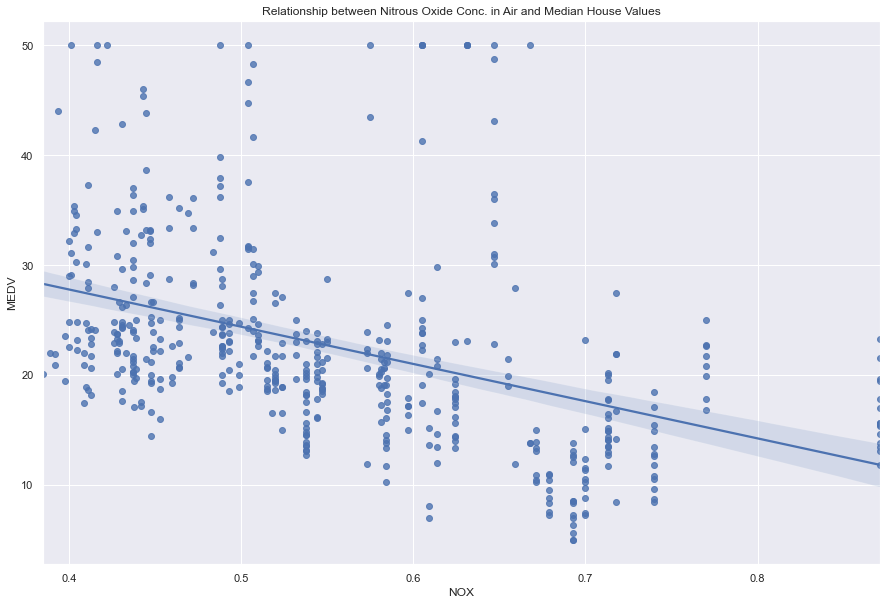

In [16]:
sns.regplot(y="MEDV",x="NOX", data=data, fit_reg= True)
plt.title("Relationship between Nitrous Oxide Conc. in Air and Median House Values")
plt.show()

We can see a strong negative correlation between NOX concentration in air and housing price values. The more concentration of NOX is in air the less the housing prices, which is quite intuitive anyways.

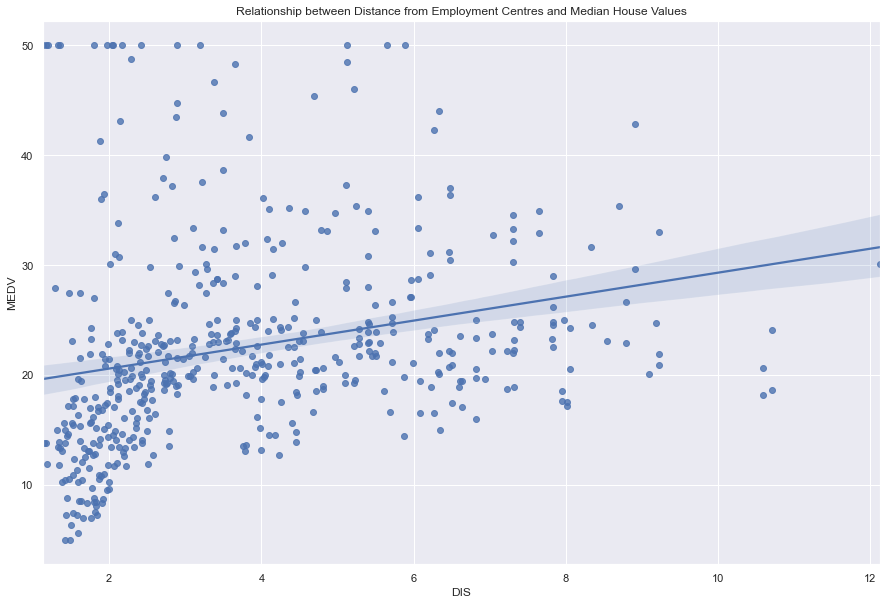

In [17]:
sns.regplot(y="MEDV",x="DIS", data=data, fit_reg= True)
plt.title("Relationship between Distance from Employment Centres and Median House Values")
plt.show()

We can see a strong postive correlation between distance of 5 employment center from town and price. The closer/farther the employment center from town the more/less the housing prices.

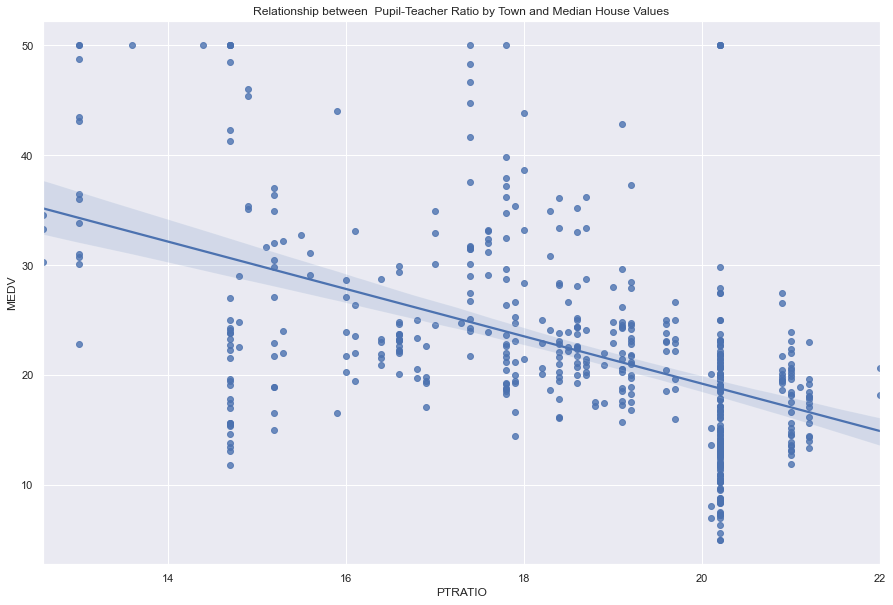

In [18]:
sns.regplot(y="MEDV",x="PTRATIO", data=data, fit_reg= True)
plt.title("Relationship between  Pupil-Teacher Ratio by Town and Median House Values")
plt.show()

As the no. of students per teacher increases, the housing prices decreases.

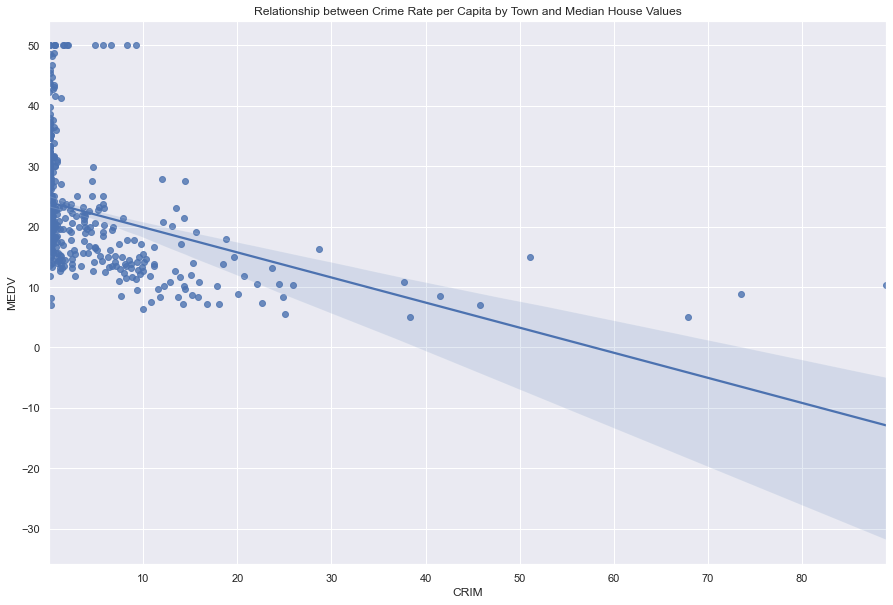

In [19]:
sns.regplot(y="MEDV",x="CRIM", data=data, fit_reg= True)
plt.title("Relationship between Crime Rate per Capita by Town and Median House Values")
plt.show()

Weaker, but still descent predictor. As the number of crimes increases the housing prices decreases.

## Data Preparation

### Transforming Skew Variables

In [20]:
df = data.copy()

In [21]:
skew_limit = 0.75 # define a limit above which we will log transform
skew_vals = data.skew()

In [22]:
# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

,Skew
CRIM,5.223149
CHAS,3.405904
ZN,2.225666
MEDV,1.108098
DIS,1.011781
RAD,1.004815
LSTAT,0.906460
PTRATIO,-0.802325
B,-2.890374


### Transforming Attributes

In [23]:
for col in skew_cols.index.values:
    if col == 'MEDV':
        continue
    df[col] = df[col].apply(np.log1p)

Text(0, 0.5, 'B')

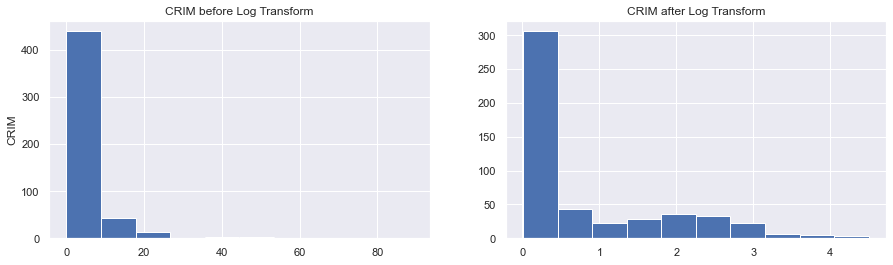

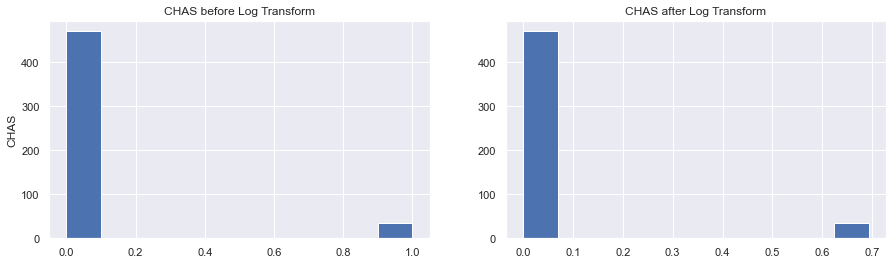

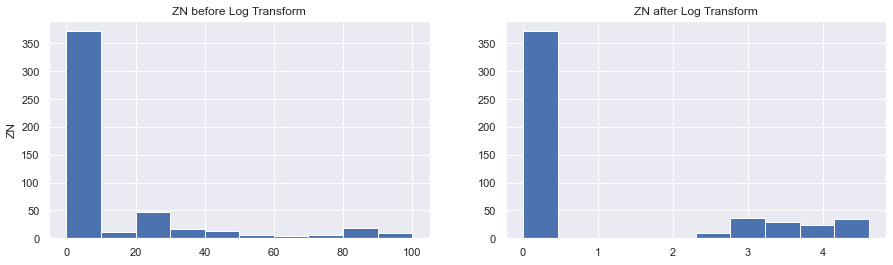

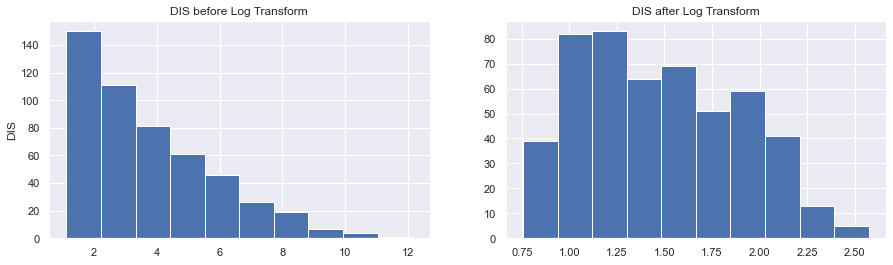

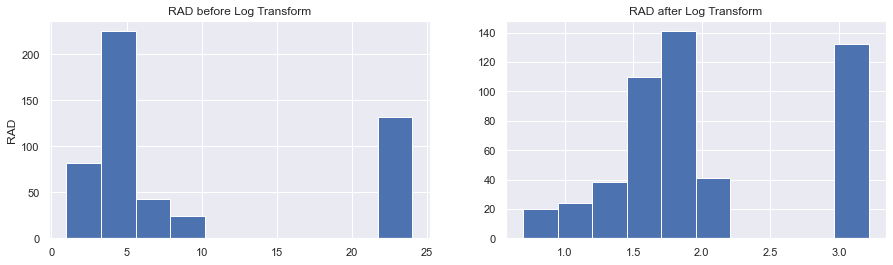

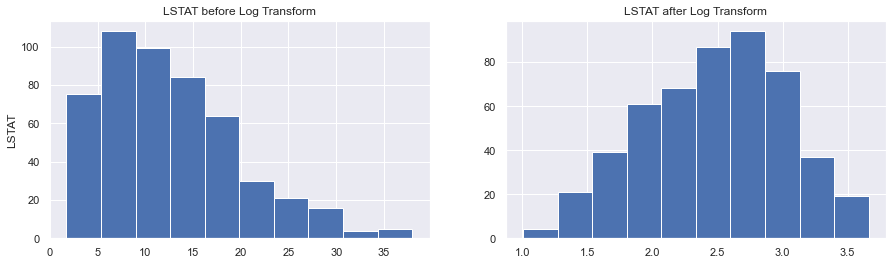

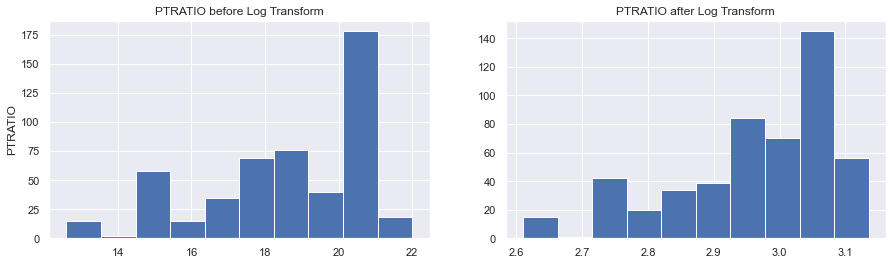

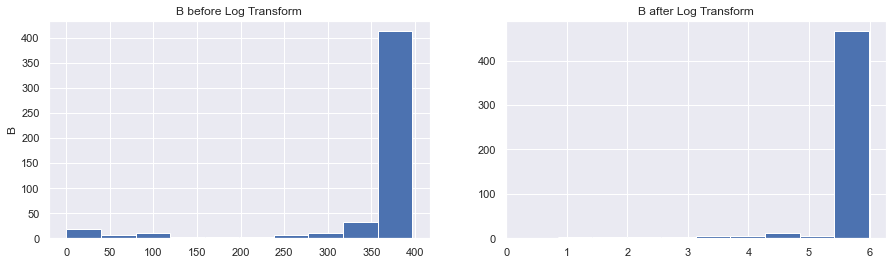

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 4))

ax1.hist(data['CRIM'])
ax2.hist(df['CRIM'])
ax1.set_title("CRIM before Log Transform")
ax2.set_title("CRIM after Log Transform")
ax1.set_ylabel("CRIM")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 4))

ax1.hist(data['CHAS'])
ax2.hist(df['CHAS'])
ax1.set_title("CHAS before Log Transform")
ax2.set_title("CHAS after Log Transform")
ax1.set_ylabel("CHAS")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 4))

ax1.hist(data['ZN'])
ax2.hist(df['ZN'])
ax1.set_title("ZN before Log Transform")
ax2.set_title("ZN after Log Transform")
ax1.set_ylabel("ZN")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 4))

ax1.hist(data['DIS'])
ax2.hist(df['DIS'])
ax1.set_title("DIS before Log Transform")
ax2.set_title("DIS after Log Transform")
ax1.set_ylabel("DIS")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 4))

ax1.hist(data['RAD'])
ax2.hist(df['RAD'])
ax1.set_title("RAD before Log Transform")
ax2.set_title("RAD after Log Transform")
ax1.set_ylabel("RAD")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 4))

ax1.hist(data['LSTAT'])
ax2.hist(df['LSTAT'])
ax1.set_title("LSTAT before Log Transform")
ax2.set_title("LSTAT after Log Transform")
ax1.set_ylabel("LSTAT")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 4))

ax1.hist(data['PTRATIO'])
ax2.hist(df['PTRATIO'])
ax1.set_title("PTRATIO before Log Transform")
ax2.set_title("PTRATIO after Log Transform")
ax1.set_ylabel("PTRATIO")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 4))

ax1.hist(data['B'])
ax2.hist(df['B'])
ax1.set_title("B before Log Transform")
ax2.set_title("B after Log Transform")
ax1.set_ylabel("B")

### Transforming Target

In [85]:
bc_result2 = boxcox(df.MEDV)
boxcox_medv = bc_result2[0]

## Building Models

Train the following models: Vanilla Linear, Ridge, Lasso, RidgeCV, LassoCV, Elastic Net and:
- Compare Accuracy Scores
- Compare Root-Mean-Square Errors
- Plot the results: Prediction vs Actual

In [86]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, LassoCV, ElasticNetCV 
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

In [87]:
X = df.drop(['MEDV'],axis=1)
y = boxcox_medv

In [88]:
scaler = StandardScaler()
lr = LinearRegression()

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=72018)

## Comparing R-squared Scores 

### Vanilla Regression - Baseline Model

In [90]:
X_train_s = scaler.fit_transform(X_train)
lr.fit(X_train_s, y_train)    
X_test_s = scaler.transform(X_test)    
y_pred = lr.predict(X_test_s)
vanilla_score = r2_score(y_test, y_pred)
vanilla_score

0.8013436386513102

### Simple Linear Regression with Cross-Validation

In [91]:
kf = KFold(shuffle=True, random_state=72018, n_splits=3)

estimator = Pipeline([("scaler", scaler),
                      ("regression", lr)])

predictions = cross_val_predict(estimator, X_train, y_train, cv=kf)

linear_reg_score = r2_score(y_train, predictions)
linear_reg_score

0.7753631981261381

### Lasso Regression with Hyperparamter Tuning but without Polynomial Features

In [92]:
alphas = np.geomspace(1e-9, 1e0, num=10)

scores = []
coefs = []
for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=100000)
    
    estimator = Pipeline([
        ("scaler", scaler),
        ("lasso_regression", las)])

    predictions = cross_val_predict(estimator, X_train, y_train, cv = kf)
    
    score = r2_score(y_train, predictions)
    
    scores.append(score)

In [93]:
list(zip(alphas, scores))

[(1e-09, 0.7753631982931093),
 (1e-08, 0.7753631996298636),
 (1e-07, 0.7753632141547971),
 (1e-06, 0.7753633563978316),
 (1e-05, 0.775364705946523),
 (0.0001, 0.7753785259547316),
 (0.001, 0.7754542280240743),
 (0.01, 0.7693040917273134),
 (0.1, 0.7118415600170118),
 (1.0, -0.01281441017053675)]

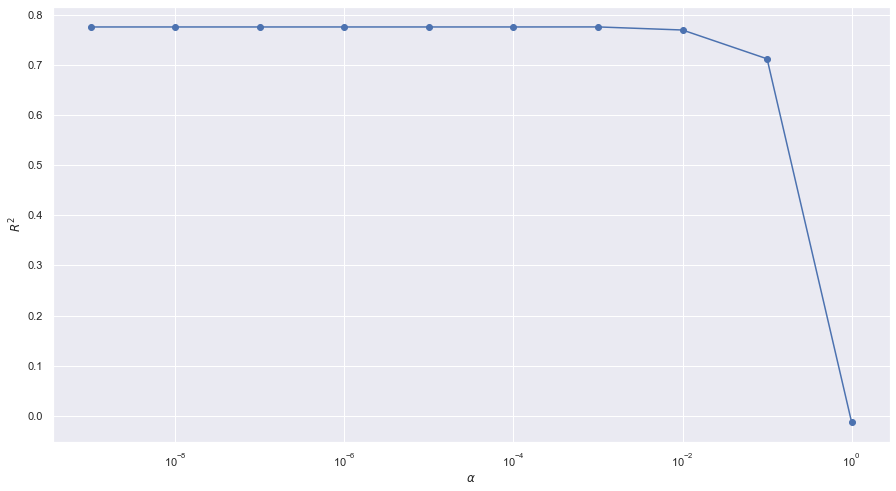

In [94]:
plt.figure(figsize=(15, 8))

plt.semilogx(alphas, scores, '-o')

plt.xlabel('$\\alpha$')

plt.ylabel('$R^2$');

In [95]:
best_estimator = Pipeline([
                    ("scaler", scaler),
                    ("lasso_regression", Lasso(alpha=0.001))])

best_estimator.fit(X_train, y_train)

lasso_reg_score = best_estimator.score(X_train, y_train)
lasso_reg_score

0.800170688455202

### Ridge Regression with Hyperparamter Tuning but without Polynomial Features

In [96]:
alphas = np.geomspace(4, 20, 20)

scores=[]
for alpha in alphas:
    ridge = Ridge(alpha=alpha, max_iter=100000)

    estimator = Pipeline([
        ("scaler", scaler),
        ("ridge_regression", ridge)])

    predictions = cross_val_predict(estimator, X_train, y_train, cv = kf)
    score = r2_score(y_train, predictions)
    scores.append(score)

In [97]:
list(zip(alphas, scores))

[(4.0, 0.7752057531021384),
 (4.353593602921549, 0.7751312938643247),
 (4.7384443148498585, 0.7750420289675277),
 (5.157315214232582, 0.7749357821658316),
 (5.6132136312332355, 0.7748101503044946),
 (6.109412739192265, 0.7746624957142754),
 (6.649475054738714, 0.7744899414686272),
 (7.237278015274221, 0.7742893700055264),
 (7.877041817465654, 0.7740574255393244),
 (8.573359716616, 0.7737905205639946),
 (9.331231004451181, 0.7734848465733791),
 (10.156096902090468, 0.7731363888957279),
 (11.053879625898109, 0.77274094526254),
 (12.03102490669371, 0.7722941474143795),
 (13.094548267592895, 0.7717914847037485),
 (14.252085392734966, 0.7712283283081673),
 (15.511946948525646, 0.7705999543417117),
 (16.88317825098993, 0.7699015638810737),
 (18.3756242076235, 0.7691282977356529),
 (20.000000000000004, 0.768275243722686)]

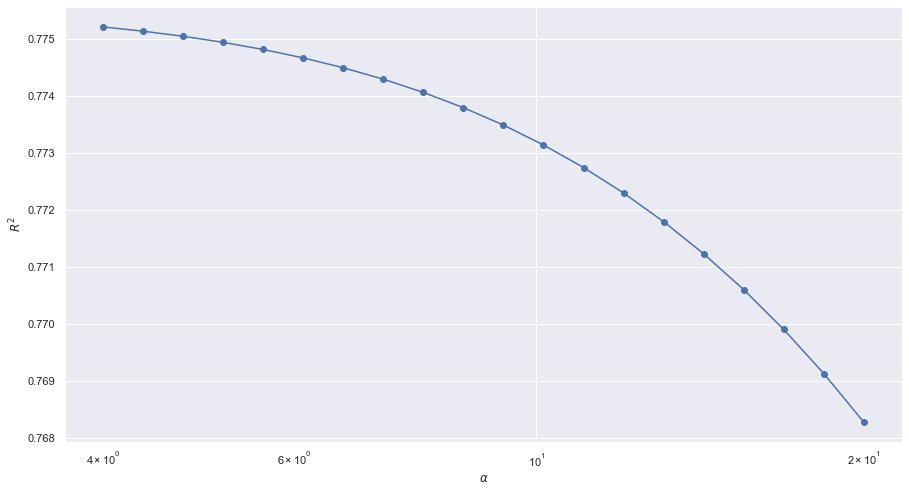

In [98]:
plt.figure(figsize=(15, 8))

plt.semilogx(alphas, scores, '-o')

plt.xlabel('$\\alpha$')

plt.ylabel('$R^2$');

In [99]:
best_estimator = Pipeline([
                    ("scaler", scaler),
                    ("ridge_regression", Ridge(alpha=4.0))])

best_estimator.fit(X_train, y_train)

ridge_reg_score = best_estimator.score(X_train, y_train)
ridge_reg_score

0.7998860418510049

### Lasso Regression with Hyperparameter Tuning and Polynomial Features

In [74]:
pf = PolynomialFeatures(degree=3)

scores = []

alphas = np.geomspace(1e-9, 1e0, num=10)

for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=100000)
    
    estimator = Pipeline([
        ("scaler", scaler),
        ("make_higher_degree", pf),
        ("lasso_regression", las)])

    predictions = cross_val_predict(estimator, X_train, y_train, cv = kf)
    
    score = r2_score(y_train, predictions)
    
    scores.append(score)

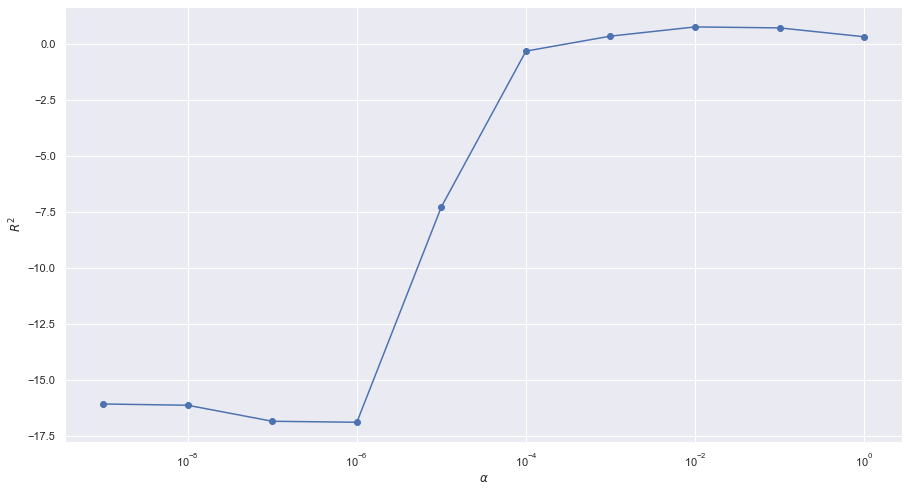

In [75]:
plt.figure(figsize=(15, 8))

plt.semilogx(alphas, scores, '-o')

plt.xlabel('$\\alpha$')

plt.ylabel('$R^2$');

In [76]:
a = list(zip(alphas, scores))

a

[(1e-09, -16.08832987911713),
 (1e-08, -16.145003277151517),
 (1e-07, -16.861055681588073),
 (1e-06, -16.905574459744905),
 (1e-05, -7.272582866290982),
 (0.0001, -0.30977852686685603),
 (0.001, 0.3595280824827918),
 (0.01, 0.7719569554187333),
 (0.1, 0.728442797186152),
 (1.0, 0.33250301582182273)]

In [65]:
# Once we have found the hyperparameter (alpha~1e-2=0.01) make the model and train it on ALL the data.
# Then release it into the wild .....
best_estimator = Pipeline([
                    ("scaler", scaler),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("lasso_regression", Lasso(alpha=0.015310350271869196))])

best_estimator.fit(X_train, y_train)

lasso_pf_reg_score = best_estimator.score(X_train, y_train)
lasso_pf_reg_score

0.8613541726664123

### Ridge Regression with Hyperparameter Tuning and Polynomial Features

In [77]:
pf = PolynomialFeatures(degree=2)

alphas = np.geomspace(4, 20, 20)

scores=[]

for alpha in alphas:
    ridge = Ridge(alpha=alpha, max_iter=100000)

    estimator = Pipeline([
        ("scaler", scaler),
        ("polynomial_features", pf),
        ("ridge_regression", ridge)])

    predictions = cross_val_predict(estimator, X_train, y_train, cv = kf)

    score = r2_score(y_train, predictions)
    
    scores.append(score)

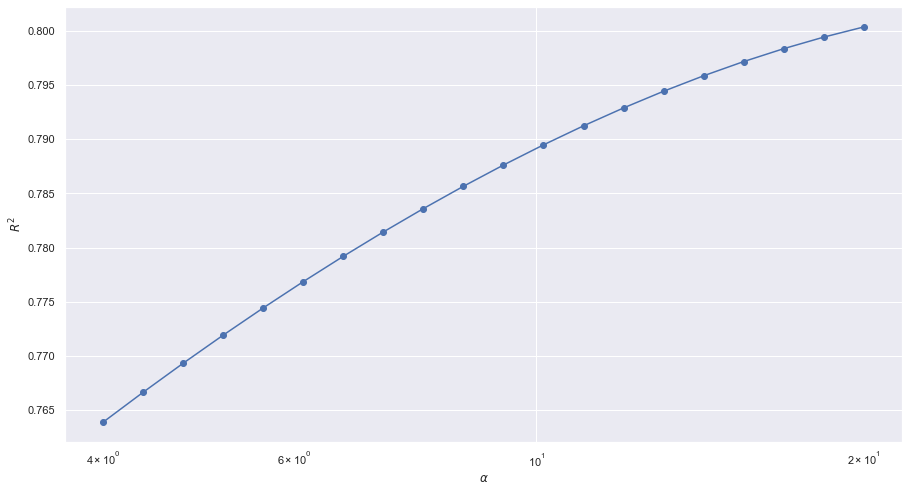

In [78]:
plt.figure(figsize=(15, 8))

plt.semilogx(alphas, scores, '-o')

plt.xlabel('$\\alpha$')

plt.ylabel('$R^2$');

In [79]:
b = list(zip(alphas, scores))

b

[(4.0, 0.7638330337638093),
 (4.353593602921549, 0.7666003823093053),
 (4.7384443148498585, 0.7692859747316663),
 (5.157315214232582, 0.7718886515513268),
 (5.6132136312332355, 0.774406954900744),
 (6.109412739192265, 0.7768391442962689),
 (6.649475054738714, 0.7791832193516067),
 (7.237278015274221, 0.7814369471706915),
 (7.877041817465654, 0.783597891961783),
 (8.573359716616, 0.7856634443592359),
 (9.331231004451181, 0.7876308480381986),
 (10.156096902090468, 0.7894972214629731),
 (11.053879625898109, 0.7912595730106469),
 (12.03102490669371, 0.7929148082332645),
 (13.094548267592895, 0.7944597286269028),
 (14.252085392734966, 0.7958910219185806),
 (15.511946948525646, 0.7972052445113099),
 (16.88317825098993, 0.7983987972945049),
 (18.3756242076235, 0.799467896488669),
 (20.000000000000004, 0.8004085415186151)]

In [80]:
best_estimator = Pipeline([
                    ("scaler", scaler),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("ridge_regression", Ridge(alpha=20))])

best_estimator.fit(X_train, y_train)

ridge_pf_reg_score = best_estimator.score(X_train, y_train)
ridge_pf_reg_score

0.9090907993260784

In [84]:
pd.DataFrame([[vanilla_score, linear_reg_score, lasso_reg_score, ridge_reg_score, lasso_pf_reg_score, ridge_pf_reg_score]], 
             columns=['Baseline Model', 'Linear', 'Lasso w/o Polynomials', 'Ridge w/o Polynomials', 'Lasso with Polynomials', 'Ridge with Polynomials'], index=['Score'])

,Baseline Model,Linear,Lasso w/o Polynomials,Ridge w/o Polynomials,Lasso with Polynomials,Ridge with Polynomials
Score,0.801344,0.775363,0.800171,0.799886,0.861354,0.909091


#### Key Findings:
 - Our Baseline Model performed well compared to Simple Linear Regression, Lasso w/o Polynomials and Ridge w/o Polynomials. But when we introduced Polynomials, Lasso and Ridge performed well. Ridge with Polynomials being the best. All the models used K-fold Cross-Validation except the Baseline one. This tells that adding Polynomial effects, does indeed make our model better. 

## Comparing Root Mean-Squared Errors 

In [100]:
from sklearn.metrics import mean_squared_error


def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

### Simple Linear Regression 

In [109]:
from sklearn.linear_model import LinearRegression

linearRegression = LinearRegression().fit(X_train, y_train)

linearRegression_rmse = rmse(y_test, linearRegression.predict(X_test))

print(linearRegression_rmse)

0.35931058538021404


### RidgeCV

Ridge regression uses L2 normalization to reduce the magnitude of the coefficients. This can be helpful in situations where there is high variance. The regularization functions in Scikit-learn each contain versions that have cross-validation built in.

In [102]:
from sklearn.linear_model import RidgeCV

alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

ridgeCV = RidgeCV(alphas=alphas, 
                  cv=4).fit(X_train, y_train)

ridgeCV_rmse = rmse(y_test, ridgeCV.predict(X_test))

print(ridgeCV.alpha_, ridgeCV_rmse)

0.1 0.35900015357283654


### LassoCV

Much like the RidgeCV function, there is also a LassoCV function that uses an L1 regularization function and cross-validation. L1 regularization will selectively shrink some coefficients, effectively performing feature elimination.

In [103]:
from sklearn.linear_model import LassoCV

alphas2 = np.array([1e-5, 5e-5, 0.0001, 0.0005])

lassoCV = LassoCV(alphas=alphas2,
                  max_iter=5e4,
                  cv=3).fit(X_train, y_train)

lassoCV_rmse = rmse(y_test, lassoCV.predict(X_test))

print(lassoCV.alpha_, lassoCV_rmse)

0.0001 0.3593498913126845


### Elastic Net 

In [104]:
from sklearn.linear_model import ElasticNetCV

l1_ratios = np.linspace(0.1, 0.9, 9)

elasticNetCV = ElasticNetCV(alphas=alphas2, 
                            l1_ratio=l1_ratios,
                            max_iter=1e4).fit(X_train, y_train)
elasticNetCV_rmse = rmse(y_test, elasticNetCV.predict(X_test))

print(elasticNetCV.alpha_, elasticNetCV.l1_ratio_, elasticNetCV_rmse)

0.0001 0.1 0.359178933164012


In [105]:
rmse_vals = [linearRegression_rmse, ridgeCV_rmse, lassoCV_rmse, elasticNetCV_rmse]

labels = ['Linear', 'Ridge', 'Lasso', 'ElasticNet']

rmse_df = pd.Series(rmse_vals, index=labels).to_frame()
rmse_df.rename(columns={0: 'RMSE'}, inplace=1)
rmse_df

,RMSE
Linear,0.359311
Ridge,0.359000
Lasso,0.359350
ElasticNet,0.359179


## Plotting Results: Actual vs. Predictions 

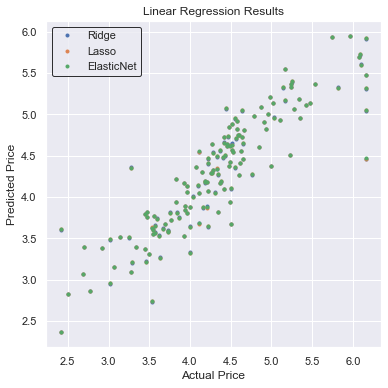

In [110]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

labels = ['Ridge', 'Lasso', 'ElasticNet']

models = [ridgeCV, lassoCV, elasticNetCV]

for mod, lab in zip(models, labels):
    ax.plot(y_test, mod.predict(X_test), 
             marker='o', ls='', ms=3.0, label=lab)


leg = plt.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)

ax.set(xlabel='Actual Price', 
       ylabel='Predicted Price', 
       title='Linear Regression Results');

#### Key Findings:
 - Ridge gives the smallest Root-mean-square error.

## Summary/Conclusion: 

The difference in Scores and Errors are not significant and almost identical. The best candidate based on Root-Mean-Square Error and R-squared Score results is Ridge Regression, therefore, we recommend RidgeCV as a final model that best suits the data.

## Next Steps:

We could further try and optimize Ridge using GridSearchCV.